# 6장. 의사결정트리와 앙상블

---

## 학습 목표
- 간단한 트리 분류기를 만들어봅니다.
- 의사결정트리를 직접 사용해보고 최적의 파라미터를 찾는 기법에 대해서 학습합니다.
- 앙상블 기법을 직접 적용해봅니다.

---

## 목차

### 1. 의사결정트리
1. 간단한 이진 트리 분류기 만들기
2. 의사결정트리
3. 최적의 파라미터 찾기

### 2. 앙상블
1. 앙상블 학습 (1)
2. 앙상블 학습 (2)


---

## 1. 의사결정트리

### 1-1. 간단한 이진 트리 분류기 만들기

사이킷런을 이용해 의사결정트리 실습을 진행하기 전에 간단한 트리 구조의 분류기를 만들어보겠습니다.

직업, 성별, 키 데이터를 기반으로 누구인지를 분류해보겠습니다.

- job, height, sex : 분류를 위한 Featrue
- name : 클래스를 의미

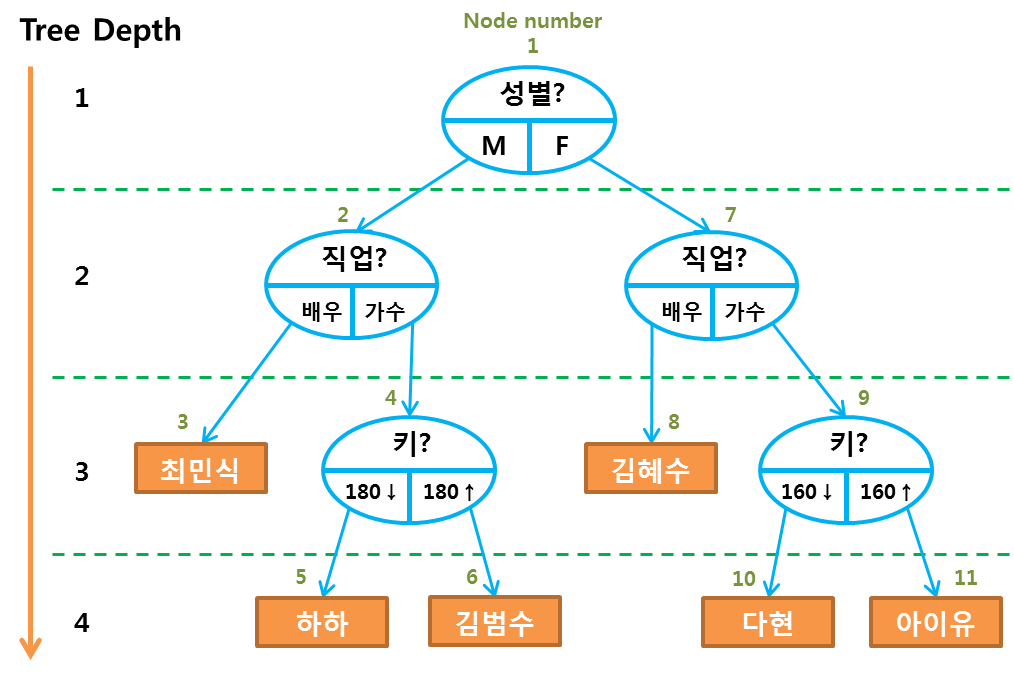

### 실습

1. `Sex_Node()`에서 성별 데이터에 따라 `male`, `female` 리스트에 `idx`를 저장해주세요.

2. 인덱스 저장 후에 `Job_Node()`에 인자를 넣어 다음 Node를 호출해주세요.

3. `Job_Node()`에서 가수인 경우와 배우인 경우를 분류하고 분류가 끝난 데이터는 이름을 출력해주세요.

4. `Job_Node()`에서 분류가 끝나면 다음 Node인 `Height_Node()`를 호출해주세요.

5. `Height_Node()`에서 우선 성별을 나누고 키에 따라 이름을 분류해보세요.

6. 트리가 어떻게 구성되어 있는지 순차적으로 코드를 따라가며 이해해보세요.

In [1]:
import numpy as np
import pandas as pd


# 직업, 키, 성별로 이름을 구분하는 간단한 이진트리 분류기를 만들어보겠습니다.
name = ['하하', '김범수', '다현', '아이유', '최민식', '김혜수']
job  = ['가수', '가수'  , '가수', '가수'  , '배우'  , '배우']
height = [171, 182, 158, 160, 177, 170]
sex = ['M', 'M', 'F', 'F', 'M', 'F']

# Node 번호를 지정해주기 위한 변수
num = 0

# 데이터 프레임 만들기
data = pd.DataFrame({'이름': name, '직업': job, '키': height,'성별': sex})
print(data,'\n')

# 키 분류 Node
def Height_Node(df, idx, depth):
    # 전역 변수를 함수 내에서 사용하기 위해 Global 선언
    global num
    num +=1
    # Node num, Depth, Node Name 출력
    print('Node_num : {} | Node Depth : {} | Height_Node'.format(num, depth))
    
    for i in idx:
        num +=1
        # 성별에 따라 키의 기준이 다르기 때문에 성별을 우선 분류
        if df['성별'][i] == 'M':
            # 남자의 경우 키에 따라 분류
            # 키가 180보다 작은 경우
            if df['키'][i] <= 180:
                print('Node_num : {} | Node Depth : {} | Name : {}'.format(num, depth, df['이름'][i]))
            # 키가 180보다 큰 경우
            else:
                print('Node_num : {} | Node Depth : {} | Name : {}'.format(num, depth, df['이름'][i]))
        else:
            # 여자의 경우 키에 따라 분류
            # 키가 160보다 작은 경우
            if df['키'][i] <= 160:
                print('Node_num : {} | Node Depth : {} | Name : {}'.format(num, depth, df['이름'][i]))
            # 키가 160보다 큰 경우
            else:
                print('Node_num : {} | Node Depth : {} | Name : {}'.format(num, depth, df['이름'][i]))

# 직업 분류 Node
def Job_Node(df,idx, depth):
    # 전역 변수를 함수 내에서 사용하기 위해 Global 선언
    global num
    num +=1
    
    # Node num, Depth, Node Name 출력
    print('Node_num : {} | Node Depth : {} | Job_Node'.format(num, depth))
    
    # Index 저장을 위한 리스트 
    singer = []
    
    for i in idx:
        # 가수인 경우 Index 저장
        if df['직업'][i] == '가수':
            singer.append(i)
            
        # 배우인 경우 Node 번호와 해당 배우의 이름 출력    
        else:
            num += 1
            print('Node_num : {} | Node Depth : {} | Name : {}'.format(num, depth, df['이름'][i]))
    
    # 가수인 경우 분류가 끝나지 않았으므로 Index 출력
    print('가수 Index : ',singer)
    
    # 마지막 분류 기준인 키를 통해 가수를 분류
    # 다음 Node를 호출할 때 depth를 하나 증가시켜줍니다.
    Height_Node(df, singer, depth + 1)

# 성별 분류 Node
def Sex_Node(df, depth):
    # 전역 변수를 함수 내에서 사용하기 위해 Global 선언
    global num
    # Node num, Depth, Node Name 출력
    num +=1
    print('Node_num : {} | Node Depth : {} | Sex_Node'.format(num, depth))
    
    male = []
    female = []
    # 처음 성별 데이터 전체로 분류
    for idx, sex in enumerate(df['성별']):
        # 남자인 경우 Index 저장
        if sex == 'M':
            male.append(idx)
        # 여자인 경우 Index 저장
        elif sex == 'F':
            female.append(idx)
    
    # Index 확인
    print('남자 Index : ',male)
    print('여자 Index : ',female)
    
    # 성별 분류 후 직업을 분류하는 Node를 호출합니다.
    # 다음 Node를 호출할 때 depth를 하나 증가시켜줍니다.
    Job_Node(data, male, depth + 1)
    Job_Node(data, female, depth + 1)

# 첫 번째 분류 기준으로 성별을 설정합니다.
Sex_Node(data, 1)

    이름  직업    키 성별
0   하하  가수  171  M
1  김범수  가수  182  M
2   다현  가수  158  F
3  아이유  가수  160  F
4  최민식  배우  177  M
5  김혜수  배우  170  F 

Node_num : 1 | Node Depth : 1 | Sex_Node
남자 Index :  [0, 1, 4]
여자 Index :  [2, 3, 5]
Node_num : 2 | Node Depth : 2 | Job_Node
Node_num : 3 | Node Depth : 2 | Name : 최민식
가수 Index :  [0, 1]
Node_num : 4 | Node Depth : 3 | Height_Node
Node_num : 5 | Node Depth : 3 | Name : 하하
Node_num : 6 | Node Depth : 3 | Name : 김범수
Node_num : 7 | Node Depth : 2 | Job_Node
Node_num : 8 | Node Depth : 2 | Name : 김혜수
가수 Index :  [2, 3]
Node_num : 9 | Node Depth : 3 | Height_Node
Node_num : 10 | Node Depth : 3 | Name : 다현
Node_num : 11 | Node Depth : 3 | Name : 아이유


---

### 1-2. 의사결정트리

여러 가지 규칙을 순차적으로 적용하면서 독립 변수 공간을 분할하는 분류 모형입니다.

분류(classification)와 회귀 분석(regression)에 모두 사용될 수 있기 때문에 CART(Classification And Regression Tree)라고도 합니다.

분류 실습을 위해 Iris 데이터를 사용하겠습니다. Iris 데이터는 **꽃받침 길이, 꽃받침 넓이, 꽃잎 길이, 꽃잎 넓이** 네 가지 Feature와 **세 종류**의 **붓꽃 라벨**로 구성되어있습니다.

각각의 Feature를 의사결정트리에 넣어 어떤 종류의 붓꽃인지 분류해보겠습니다.

- `DecisionTreeClassifier()`
    - max_depth : 트리의 층
    - min_samples_split : 각 트리 별 노드의 개수

**의사결정트리 예시 사진**

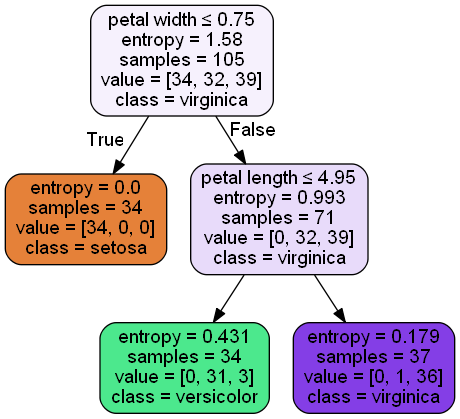

### 실습

1. `train_test_split()`으로 학습 데이터와 검증데이터로 나눠보세요.

2. `iris_tree`에 의사결정트리 객체를 불러오세요.

3. `fit()`을 사용해 트리를 학습시켜보세요.

4. 검증 데이터로 결과를 예측하고 정확도를 계산해보세요.

In [2]:
from sklearn import tree
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
Y = iris.target

# 자동으로 데이터셋을 분리해주는 함수
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# 데이터 표준화 작업
sc = StandardScaler()
sc.fit(X_train)

# 표준화된 데이터셋
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Decision Tree 학습
iris_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)
iris_tree.fit(X_train, Y_train)

# test 데이터에 대한 accuracy 측정
Y_pred_tr = iris_tree.predict(X_test)
print('Accuracy: %.5f' % accuracy_score(Y_test, Y_pred_tr))

Accuracy: 0.91111


---

### 1-3. 최적의 파라미터 찾기

**GridSearceCV**

사이킷런에서 제공하는 API로 교차 검증과 하이퍼 파라미터 튜닝을 동시에 할 수 있습니다.

일반적으로 Gridsearch를 이용해 최적의 하이퍼 파라미터 튜닝을 수행한 후에 Test data로 모델을 평가하는 것이 일반적인 머신러닝 모델 적용방법 입니다.

이전 실습에서 진행했던 의사결정트리 예제에 `GridSearchCV()`를 적용해보겠습니다.

의사결정트리 내부에는 트리의 깊이와 각 트리당 노드의 개수를 결정하는 파라미터가 있습니다.

- max_depth
- min_sample_splits

위의 두개의 파라미터에 `GridSearchCV()`를 적용해 최적의 성능을 내는 깊이와 노드 개수를 찾아보겠습니다.

- `GridSearchCV()`
    - estimator : Classifier, Regressor, pipeline 등이 사용됩니다.
    - param_gird : Dictionary 값이 주어집니다. estimator의 튜닝을 위해 파라미터 명과 값을 지정합니다.
    - scoring : 예측 성능을 측정할 평가 방법을 지정합니다.
    - cv : 교차 검증을 위해 분할되는 학습/테스트 개수를 지정합니다.
    - refit : 가장 최적의 하이퍼 파라미터를 찾은 후 estimator 객체를 해당 하이퍼 파라미터로 재학습시킵니다. (default = True)

- `GridSearchCV()` 속성
    - best_params_ : 최적의 파라미터 반환
    - best_score_ : 최고 정확도 반환
    - best_estimator_ : 최적의 파라미터로 학습된 estimator 반환

**실습**

1. 작성된 코드를 보며 이해해보세요.

2. `iris_data()`와 `DecisionTreeClassifier()` 를 불러오세요.

3. `param_grid`에 `criterion`, `max_depth`, `min_samples_split`의 값을 딕셔너리 형태로 넣어주세요. 값은 1차원 리스트로 넣어주세요.

4. `GridSearchCV()`에 `dtree`, `param_grid`, `cv`를 설정해주세요.

5. 의사결정트리를 학습시키고 결과를 예측해보세요.

6. 데이터 준비, 모델 설정, 학습, 결과 출력이 어떻게 이루어지는지 숙지하세요.

7. `param_grid`를 바꿔가며 가장 높은 최고 정확도가 나오도록 해보세요.

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
Y = iris.target

# 자동으로 데이터셋을 분리해주는 함수
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# 데이터 표준화 작업
sc = StandardScaler()
sc.fit(X_train)

# 표준화된 데이터셋
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Decision Tree 선언
iris_tree = tree.DecisionTreeClassifier(random_state=0)

# 의사 결정 트리의 인자 값 설정
# 학습을 진행할 때 트리의 깊이와 각 트리당 노드의 개수를 정해줍니다. 
param_grid = {'criterion' : ['entropy', 'gini'], 'max_depth' : [1,2,3,4,5], 'min_samples_split' : [2,3]}

# param_grid에 선언된 모든 조합의 경우에 대해 학습을 진행하며 최종적으로는 GridSearchCV가 가장 성능이 좋은 파라미터를 선택합니다.
grid_dtree = GridSearchCV(iris_tree, param_grid = param_grid, cv = 5, refit= True, return_train_score=True)

# 의사 결정 트리 학습
grid_dtree.fit(X_train, Y_train)
    

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 2, 3, 4, 5],
             

In [4]:
# 출력을 위한 데이터 프레임 만들기
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'mean_train_score', 'std_train_score']]

,params,mean_test_score,rank_test_score,mean_train_score,std_train_score
0,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.695238,17,0.695238,0.005832
1,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.695238,17,0.695238,0.005832
2,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.914286,12,0.957143,0.016148
3,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.914286,12,0.957143,0.016148
4,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.933333,3,0.969048,0.016148
5,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.933333,3,0.969048,0.016148
6,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.933333,5,0.983333,0.012141
7,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.933333,5,0.983333,0.012141
8,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.933333,5,0.990476,0.008909
9,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.933333,5,0.988095,0.007529


In [5]:
# GridSearchCV()가 가지고 있는 속성들을 불러 결과를 출력해보세요.
print('GridSearchCV 최적 파라미터 : ', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid_dtree.best_score_))

# 최적의 파라미터로 학습된 트리 Estimator 가져오세요.
estimator = grid_dtree.best_estimator_

# 검증 데이터로 결과 예측
Y_pred_tr = estimator.predict(X_test)
print('Accuracy: %.5f' % accuracy_score(Y_test, Y_pred_tr))

GridSearchCV 최적 파라미터 :  {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.9429
Accuracy: 0.97778
